In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from gis_functions import *


In [2]:
csvfile=r'C:\Users\fabrizio\Documents\repos\MSC\output/oebo.csv'
gdf=csv_to_gdf(csvfile)
joined=sjoin(gdf)


#insert  %of only mechanic to freq
extracted=extract_data2(joined)


                                             ANLAGENAME  EW60  INBETRIEBNAHME  \
0     Roith                                         ...    50            1998   
1     Reisinger Erika und Franz                     ...    50            1996   
2     Puchner Gasthaus Neumühle                     ...    50            2002   
3     Ebenort-Abwasser                              ...    50            2013   
4     Kern Margit                                   ...    50            2004   
...                                                 ...   ...             ...   
2517  Weixelbaumer Herbert                          ...     3            2010   
2518  Holzmüller und Riegler                        ...     2            1905   
2519  Kameradschaft Bergrettungsdienst Traunkirchen ...     2            2016   
2520  Fischer Gertraud                              ...     2            1905   
2521  Gruber Sigrid                                 ...     2            1995   

                           

In [3]:
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)
oebo_base=basemap[basemap.BL=='Oberösterreich']


C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


6976           Annotation(14.4785, 47.9431, 'Lausa')
2325         Annotation(14.4183, 47.7395, 'Rosenau')
1002    Annotation(14.2278, 47.6969, 'Vorderstoder')
5661     Annotation(14.6956, 48.5032, 'Harrachstal')
5633      Annotation(14.9508, 48.2766, 'Waldhausen')
dtype: object

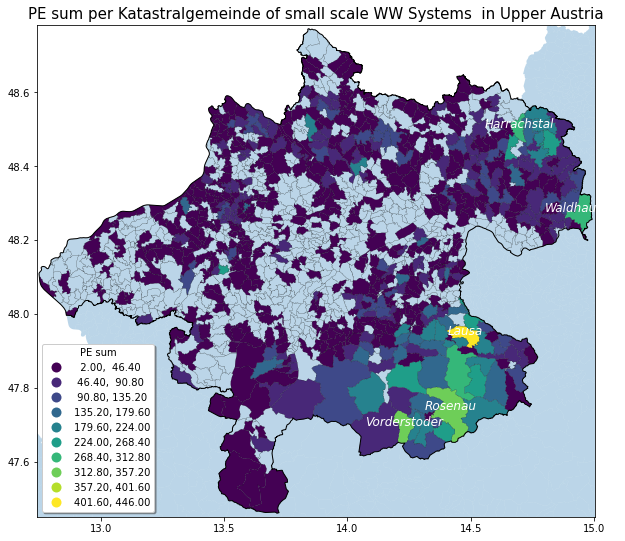

In [68]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('PE sum per Katastralgemeinde of small scale WW Systems  in Upper Austria', fontsize=15)
extracted.plot(column='sum_EW', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'PE sum'})


oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine
BL=oebo_base.geometry.unary_union
BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)



#only label first 5 bezirke 
extracted.sort_values('sum_EW', inplace=True, ascending=False)
extracted.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='white'), axis=1)


#plt.savefig('try.png')


C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


6976           Annotation(14.4785, 47.9431, 'Lausa')
2325         Annotation(14.4183, 47.7395, 'Rosenau')
1002    Annotation(14.2278, 47.6969, 'Vorderstoder')
5661     Annotation(14.6956, 48.5032, 'Harrachstal')
5633      Annotation(14.9508, 48.2766, 'Waldhausen')
dtype: object

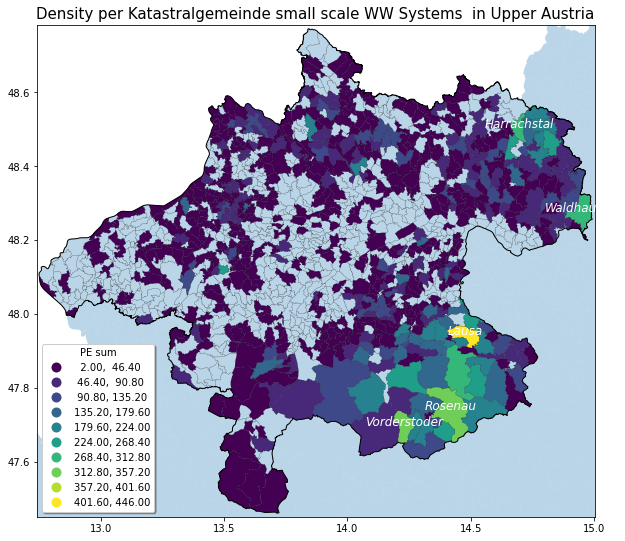

In [79]:
#plot for total infrastructure density
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Density per Katastralgemeinde small scale WW Systems  in Upper Austria', fontsize=15)
extracted.plot(column='sum_EW', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'PE sum'})


oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#return only boundary of BL works fine
BL=oebo_base.geometry.unary_union
BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

minx, miny, maxx, maxy=oebo_base.total_bounds

ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)



#only label first 5 bezirke 
extracted.sort_values('sum_EW', inplace=True, ascending=False)
extracted.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='white'), axis=1)


#plt.savefig('try.png')


adding % of old or mechnaic on total per KG

In [6]:
#strings are summed. need int of bool for this
#convert j and n ?
joined.groupby(['KG_NR','NITRIFIZIERUNG']).sum()

MERIDIAN     GKZ   BKZ  FA_NR  BL_KZ  ST_KZ        FL  \
KG_NR NITRIFIZIERUNG                                                          
40001 j                     31   40412   404     41      4      1  17111719   
      n                     31   40412   404     41      4      1  17111719   
40008 j                    155  202190  2020    205     20      5  49975105   
40010 j                     31   40423   404     41      4      1   5250360   
40013 j                     62   80808   808     82      8      2   6931118   
...                        ...     ...   ...    ...    ...    ...       ...   
51231 j                     62   83638   836    108      8      2  17979742   
51232 j                     31   41824   418     54      4      1   4478948   
51233 j                     62   83638   836    108      8      2  13279762   
51240 n                     31   41816   418     54      4      1   5969217   
51243 j                     31   41824   418     54      4      1   8731669   

                      index_right  EW60  INBETRIEBNAHME  Tonne TM  Typ  \
KG_NR NITRIFIZIERUNG                                                     
40001 j                      2377     4            2014  0.053015    4   
      n                      2376     4            1985  0.080000    6   
40008 j                      8723    30           10034  0.546030   27   
40010 j                      1107     8            2010  0.106030    3   
40013 j                      4013    10            4028  0.142313    7   
...                           ...   ...             ...       ...  ...   
51231 j                      4471    10            4007  0.159523   11   
51232 j                      2373     5            2003  0.066269    3   
51233 j                      3459    15            4020  0.266269    9   
51240 n                      2371     5            1905  0.100000    8   
51243 j                       831    12            2004  0.124627    1   

                      before_reg  freq  sum_EW  
KG_NR NITRIFIZIERUNG                            
40001 j                        0     2       8  
      n                        1     2       8  
40008 j                        0    25     150  
40010 j                        0     1       8  
40013 j                        0     4      20  
...                          ...   ...     ...  
51231 j                        0     4      20  
51232 j                        0     1       5  
51233 j                        0     4      30  
51240 n                        1     1       5  
51243 j                        0     1      12  

[784 rows x 15 columns]

In [7]:
#returns sum of trues per kg
joined.groupby('KG_NR')['before_reg'].sum()

#this would work if bool or int
joined['%']=joined.groupby('KG_NR')['NITRIFI'].transform('sum')


KeyError: 'Column not found: NITRIFI'

In [ ]:
#plot for old infrastructure density
fig,ax=plt.subplots(1,figsize=(10,15))
oebo_base.plot(ax=ax, alpha=0.3)
joined.plot(column='before_reg', ax=ax,legend=True,scheme='equal_interval', k=10)
ax.set_title('Density per Katastralgemeinde small scale WW Systems  in Upper Austria', fontsize=20)

oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)
